<a href="https://colab.research.google.com/github/faruq2021/My-ML-MODEL-NOTEBOOKS/blob/main/BREAST_CANCER_PREDICTOR_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is a notebook for an ML model that can predict breast cancer as either Benign(class 1) or Malignant(class 0)The wisconsin breast cancer data sets was gotten from Kaggle and it contains Features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle 


**Upload the data as bc_data from my google colab, bear in mind that you have to manually upload this data to colab(click on files on the top left corner of google colab, select the arrow pointing upwards and click on it, then it will open up youe local directories, just navigate to where your data is saved then select and colab will upload it, alternatively you can save your data on your google drive then mount you drive on google colab**

In [2]:
bc_data=pd.read_csv('/content/drive/MyDrive/data.csv')

In [3]:
bc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#lets convert the diagnosis outcome from object type to an integer, where Malignant(M)=0 and Benign(B)=1, this will be our two classes
bc_data['diagnosis']=bc_data['diagnosis'].replace({'M':0,'B':1})

In [5]:
bc_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [6]:
#Checking for missing values
bc_data.isna().count()
#It appears there are no missing values.

id                         569
diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
Unnamed:

**The data already has been cleaned, there are no missing values all the features required for training are numerical and our target vector which is the diagnosis is in Binary form thus good for binary classification
The code below will be used for feature selection to select our X and Y , the feature matrix and target vector(classes)**

In [7]:
X=np.asarray(bc_data[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']])

In [8]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 1.471e-01, 2.419e-01,
        7.871e-02],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 7.017e-02, 1.812e-01,
        5.667e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 1.279e-01, 2.069e-01,
        5.999e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 5.302e-02, 1.590e-01,
        5.648e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 1.520e-01, 2.397e-01,
        7.016e-02],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 1.587e-01,
        5.884e-02]])

In [9]:
y=(bc_data['diagnosis'])

In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

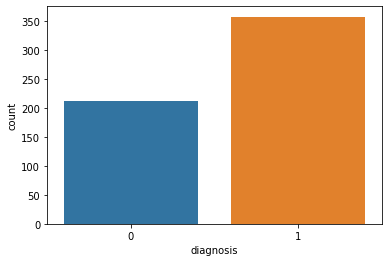

In [11]:
#Let's plot a count plot for Y to visualize the count of Malignant and Benign diagnosis from the data
sns.countplot(x="diagnosis", data=bc_data)

In [12]:
y.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [13]:
#percentage of Benign and malignant diagnosis from total of all diagnosis can be calculated as
percent_B= 357/569*100
percent_M= 212/569*100
print(f'percentage of Benign(B) tumor from all diagnosis of the data is {percent_B} % ')
print(f'percentage of Malignanat(M) tumor from all diagnosis of the data is {percent_M} %')

percentage of Benign(B) tumor from all diagnosis of the data is 62.741652021089635 % 
percentage of Malignanat(M) tumor from all diagnosis of the data is 37.258347978910365 %


Let us normalize our feature matrix, the X variable.

In [16]:
#Normalization using standard scaler, to make the mean of the feature matrix 0 and standard deviation 1
from sklearn import preprocessing 

StandardScaler=preprocessing.StandardScaler()
#fit transform the feature
X=StandardScaler.fit_transform(X)
X






array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00, ...,
         2.53247522e+00,  2.21751501e+00,  2.25574689e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00, ...,
         5.48144156e-01,  1.39236330e-03, -8.68652457e-01],
       [ 1.57988811e+00,  4.56186952e-01,  1.56650313e+00, ...,
         2.03723076e+00,  9.39684817e-01, -3.98007910e-01],
       ...,
       [ 7.02284249e-01,  2.04557380e+00,  6.72675785e-01, ...,
         1.05777359e-01, -8.09117071e-01, -8.95586935e-01],
       [ 1.83834103e+00,  2.33645719e+00,  1.98252415e+00, ...,
         2.65886573e+00,  2.13719425e+00,  1.04369542e+00],
       [-1.80840125e+00,  1.22179204e+00, -1.81438851e+00, ...,
        -1.26181958e+00, -8.20069901e-01, -5.61032377e-01]])

Now that our Features and target are known, we can go ahead to split the data into train and test sets

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=5)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (398, 10) (398,)
Test set: (171, 10) (171,)


**Next we train our Classification model**

In [20]:
from sklearn.neighbors import KNeighborsClassifier
bc_predictor=KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train) 
bc_predictor

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [21]:
#make prediction on the test data with the model named bc_predictor
y_pred = bc_predictor.predict(X_test)
y_pred[0:5]

array([0, 1, 1, 1, 1])

In [22]:
#use some evaluation metrics to check for the performance of our model
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, bc_predictor.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.949748743718593
Test set Accuracy:  0.8771929824561403


Confusion matrix, without normalization
[[58  3]
 [18 92]]


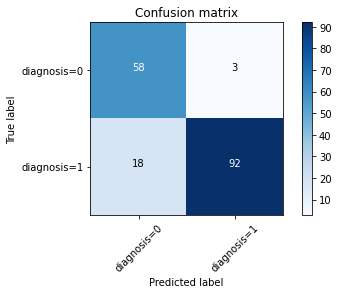

In [23]:
#use confusion matrix for evaluation
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])

#function plots our confusion matrix 
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['diagnosis=0','diagnosis=1'],normalize= False,  title='Confusion matrix')


In [24]:
#print the accuracy, precision, recall and f1-score of the model..Rememeber a good model tends to value of one for these metrics.
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85        61
           1       0.97      0.84      0.90       110

    accuracy                           0.88       171
   macro avg       0.87      0.89      0.87       171
weighted avg       0.90      0.88      0.88       171



**We have built our model with an accuracy of 0.88 that is 88% accuracy now lets save it as a file i prepration for MLOPS**

In [25]:
#Save model using Pickel, you can as well use Joblib, they are two different packages that do same thing
import pickle


In [28]:
#filename = 'finalized_model.sav'
#pickle.dump(bc_predictor, open(filename, 'wb'))

pickle.dump(bc_predictor, open('model.pkl', 'wb'))

In [30]:
#load and test the pickled model
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)[0:5]

array([0, 1, 1, 1, 1])